# **PYTHON PROGRAMMING FOR DATA SCIENCE & TEXT MINING (TEC 645) FINAL PROJECT** 

## **1. Load the Tweets.csv file and print the first 10 samples.**

In [3]:
import pandas as pd

# Load the CSV file
file_path = 'C:\\Users\\Simba Chanduru\\OneDrive\\Personal\\IIG\\Programming\\Assignments\\Final 20231222\\Tweets.csv'
tweets_df = pd.read_csv(file_path)

# Display the first 10 samples
tweets_df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [4]:
# Data Inspection: Checking for missing values and data types
missing_values = tweets_df.isnull().sum()
data_types = tweets_df.dtypes

# Statistical Summary
statistical_summary = tweets_df.describe()

missing_values, data_types, statistical_summary


(tweet_id                            0
 airline_sentiment                   0
 airline_sentiment_confidence        0
 negativereason                   5462
 negativereason_confidence        4118
 airline                             0
 airline_sentiment_gold          14600
 name                                0
 negativereason_gold             14608
 retweet_count                       0
 text                                0
 tweet_coord                     13621
 tweet_created                       0
 tweet_location                   4733
 user_timezone                    4820
 dtype: int64,
 tweet_id                          int64
 airline_sentiment                object
 airline_sentiment_confidence    float64
 negativereason                   object
 negativereason_confidence       float64
 airline                          object
 airline_sentiment_gold           object
 name                             object
 negativereason_gold              object
 retweet_count                 

## **2. Show which column will be used as input for the classification.** 

In [5]:
# Display 10 examples from the 'text' column
text_examples = tweets_df['text'].head(10)
text_examples

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8      @virginamerica Well, I didn't…but NOW I DO! :-D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object

The ***text column will be the primary input*** for the sentiment analysis model as it contains the actual content of the tweet.

## **3. Show which column will be used as output for the classification**

In [6]:
# Display 10 examples from the 'text' column
sentiment_examples = tweets_df['airline_sentiment'].head(10)
sentiment_examples

0     neutral
1    positive
2     neutral
3    negative
4    negative
5    negative
6    positive
7     neutral
8    positive
9    positive
Name: airline_sentiment, dtype: object

For output classification, the most appropriate column to use as the output (or target variable) is the **airline_sentiment** column. This column contains labels that represent the sentiment of each tweet, typically categorized into classes, "positive", "negative", or "neutral".

## **4. Transform the values of the output columns from categorical to numerical ones.**

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Transform the 'airline_sentiment' column
tweets_df['airline_sentiment_encoded'] = label_encoder.fit_transform(tweets_df['airline_sentiment'])

# Show the first 10 rows of the dataset with the new encoded column
tweets_df[['airline_sentiment', 'airline_sentiment_encoded']].head(10)

,airline_sentiment,airline_sentiment_encoded
0,neutral,1
1,positive,2
2,neutral,1
3,negative,0
4,negative,0
5,negative,0
6,positive,2
7,neutral,1
8,positive,2
9,positive,2


This is a necessary step in preparing data for machine learning algorithms, as they usually require numerical input.

## **5. Perform an exploratory data analysis on the data and create at least five plots of your choice.**

In [8]:
# Overview of the data
data_overview = {
    "Shape": tweets_df.shape,
    "Columns": tweets_df.columns.tolist(),
}

# Summary statistics for numerical columns
numerical_summary = tweets_df.describe()

# Missing values
missing_values = tweets_df.isna().sum()

data_overview, numerical_summary, missing_values


({'Shape': (14640, 16),
  'Columns': ['tweet_id',
   'airline_sentiment',
   'airline_sentiment_confidence',
   'negativereason',
   'negativereason_confidence',
   'airline',
   'airline_sentiment_gold',
   'name',
   'negativereason_gold',
   'retweet_count',
   'text',
   'tweet_coord',
   'tweet_created',
   'tweet_location',
   'user_timezone',
   'airline_sentiment_encoded']},
            tweet_id  airline_sentiment_confidence  negativereason_confidence  \
 count  1.464000e+04                  14640.000000               10522.000000   
 mean   5.692184e+17                      0.900169                   0.638298   
 std    7.791112e+14                      0.162830                   0.330440   
 min    5.675883e+17                      0.335000                   0.000000   
 25%    5.685592e+17                      0.692300                   0.360600   
 50%    5.694779e+17                      1.000000                   0.670600   
 75%    5.698905e+17                      1.000

### Dataset Structure
- **Shape**: The dataset has 14,640 rows and 16 columns.
- **Columns**: Key columns include `tweet_id`, `airline_sentiment`, `airline_sentiment_confidence`, `negativereason`, `negativereason_confidence`, `airline`, and `text`. The new column `airline_sentiment_encoded` an encoded version of `airline_sentiment` which we did above.

### Statistical Summary
- **Airline Sentiment Confidence (`airline_sentiment_confidence`)**:
  - Ranges from 0.335 to 1.0 with a mean of 0.900. This high average suggests a strong confidence in the sentiment labeling.
- **Negative Reason Confidence (`negativereason_confidence`)**:
  - Only applicable to tweets with a negative reason. It ranges from 0 to 1, with an average of around 0.638, indicating moderate confidence in the reasons provided for negative sentiments.

### Missing Values
- Several columns have missing values. Notably:
  - **Negative Reason (`negativereason`)**: 5,462 missing values, likely because they are only applicable for negative sentiments.
  - **Negative Reason Confidence (`negativereason_confidence`)**: 4,118 missing values, again likely because they are only relevant for negative 

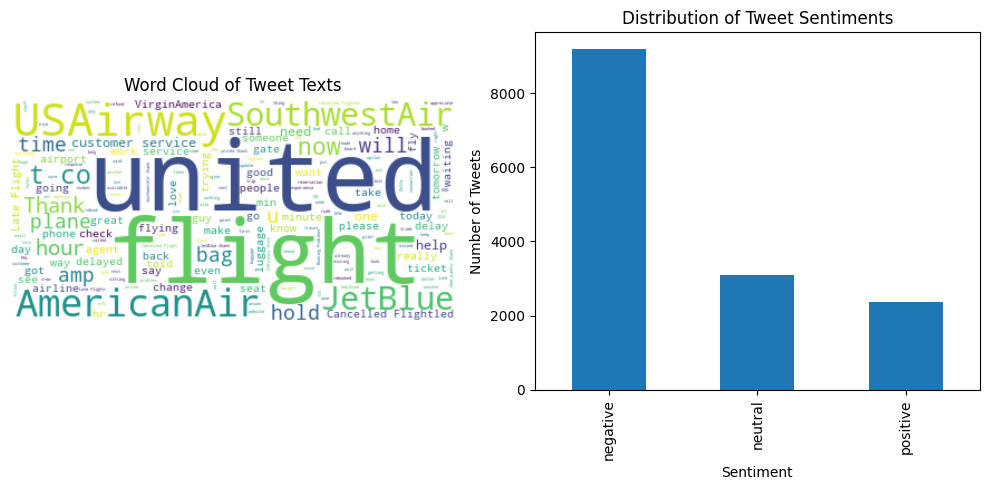

(count    14640.000000
 mean       103.822063
 std         36.277339
 min         12.000000
 25%         77.000000
 50%        114.000000
 75%        136.000000
 max        186.000000
 Name: text_length, dtype: float64,
 airline_sentiment
 negative    9178
 neutral     3099
 positive    2363
 Name: count, dtype: int64)

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Text Data Exploration: Analyzing the length of tweets and common words
tweets_df['text_length'] = tweets_df['text'].apply(len)

# Creating a word cloud for visualization of common words in tweets
text_combined = " ".join(tweet for tweet in tweets_df.text)
wordcloud = WordCloud(background_color='white').generate(text_combined)

# Sentiment Distribution Analysis
sentiment_distribution = tweets_df['airline_sentiment'].value_counts()

# Plotting
plt.figure(figsize=(10, 5))

# Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Texts')

# Sentiment Distribution
plt.subplot(1, 2, 2)
sentiment_distribution.plot(kind='bar')
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.tight_layout()
plt.show()

# Descriptive statistics for tweet length
tweet_length_stats = tweets_df['text_length'].describe()
tweet_length_stats, sentiment_distribution


C:\Users\Simba Chanduru\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Simba Chanduru\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Simba Chanduru\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Simba Chanduru\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

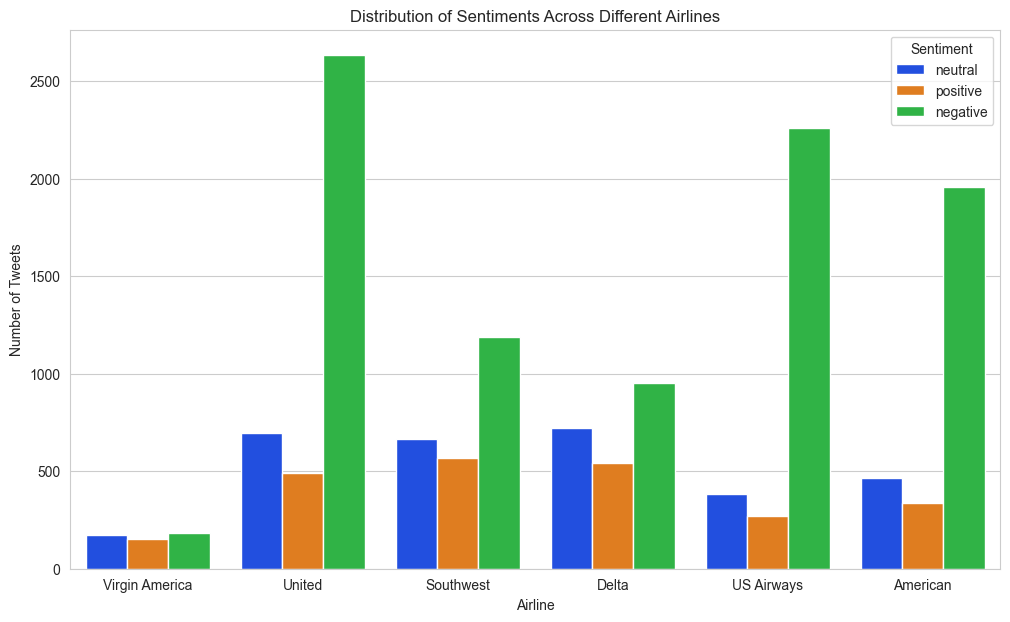

C:\Users\Simba Chanduru\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Simba Chanduru\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Simba Chanduru\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


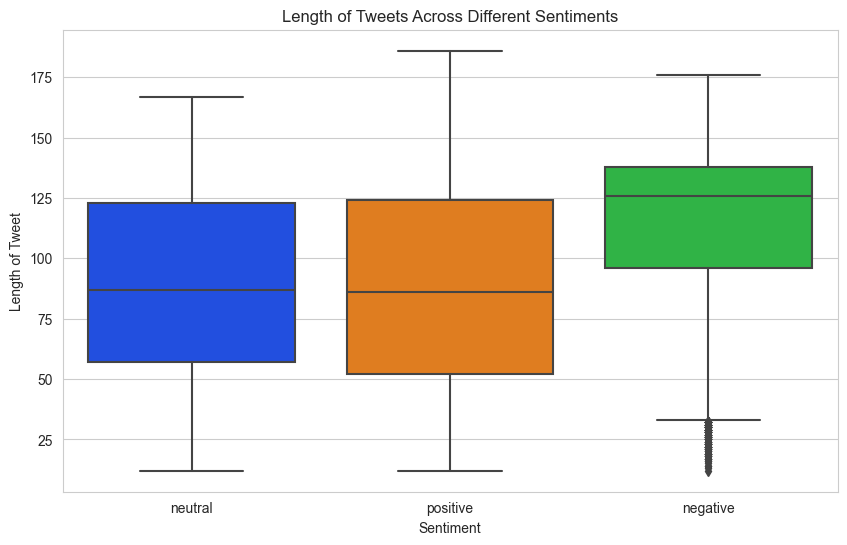

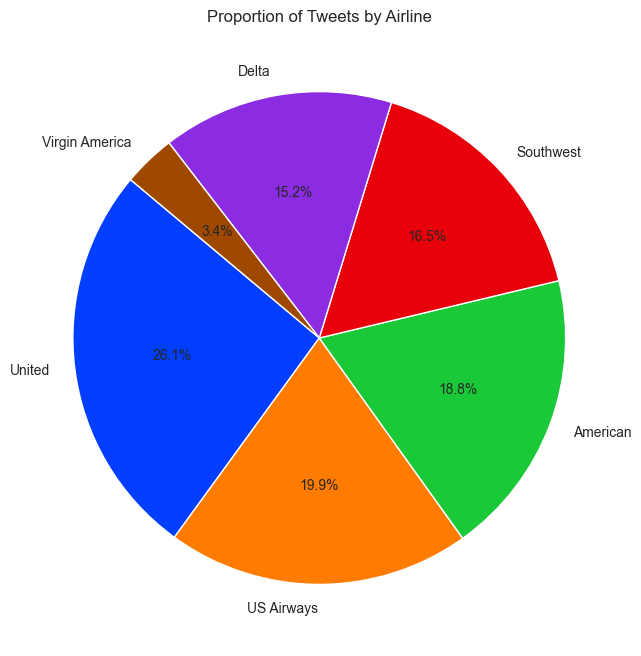

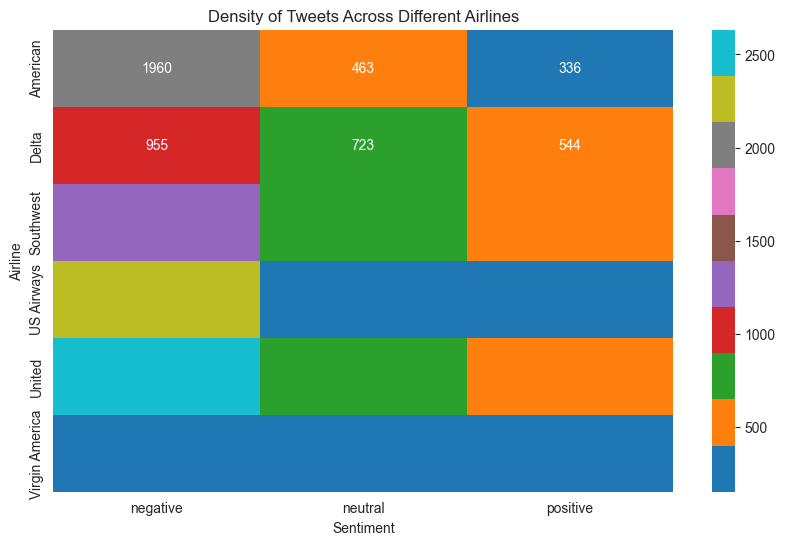

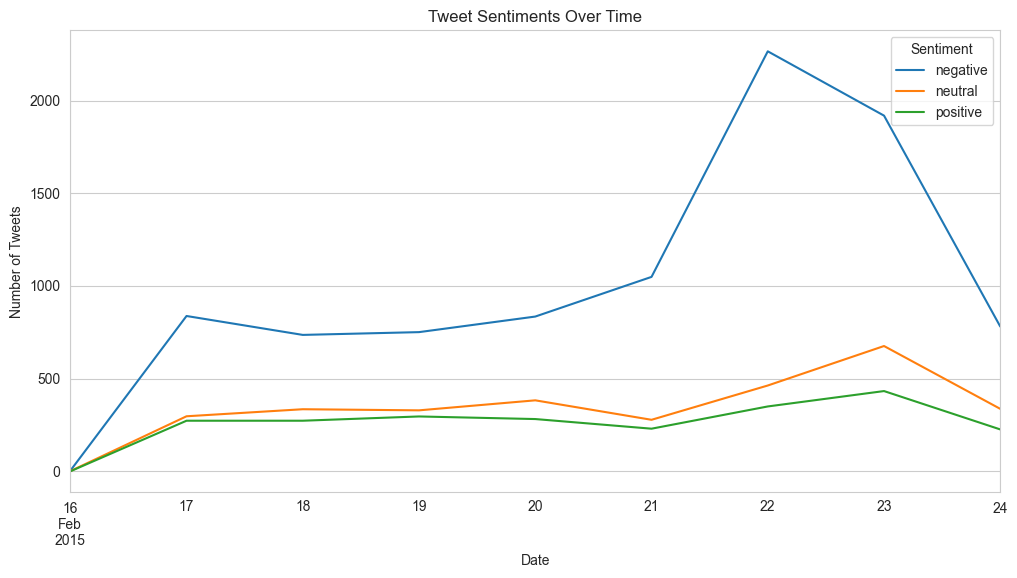

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of sentiments across different airlines
plt.figure(figsize=(12, 7))
sns.countplot(x='airline', hue='airline_sentiment', data=tweets_df, palette='bright')
plt.title('Distribution of Sentiments Across Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.show()

# Calculate the length of each tweet
tweets_df['tweet_length'] = tweets_df['text'].apply(len)

# Create a Box Plot comparing the length of tweets across different sentiments
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline_sentiment', y='tweet_length', data=tweets_df, palette='bright')
plt.title('Length of Tweets Across Different Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Length of Tweet')
plt.show()

# Pie Chart for the Proportion of Tweets by Airline
airline_tweet_counts = tweets_df['airline'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(airline_tweet_counts, labels = airline_tweet_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright', len(airline_tweet_counts)))
plt.title('Proportion of Tweets by Airline')
plt.show()

# Heatmap showing the density of tweets across different airlines
heatmap_data = pd.crosstab(tweets_df['airline'], tweets_df['airline_sentiment'])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='tab10')
plt.title('Density of Tweets Across Different Airlines')
plt.xlabel('Sentiment')
plt.ylabel('Airline')
plt.show()

# Time Series Plot for Tweet Sentiments Over Time
# First, convert the 'tweet_created' to datetime
tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created'])

# Resample to get daily counts
daily_sentiment = tweets_df.resample('D', on='tweet_created')['airline_sentiment'].value_counts().unstack().fillna(0)

# Create the time series plot
daily_sentiment.plot(kind='line', figsize=(12, 6))
plt.title('Tweet Sentiments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.show()

1. **The most mentioned words**:
   The negative tweets were always more than the neutral and positive. The negative tweets peaked sharply on Sunday, 22 February 2015 before starting to decline sharply a day after, with the neutral and positive sentiments recording a modest bump, suggesting that there must have been an incident that riled passengers and was resolved Sunday going into Monday the 23rd.

2. **Distribution of Airline Sentiments**:
   - The first plot shows the overall distribution of sentiments in the dataset. It's clear that the majority of tweets are negative, followed by neutral and positive tweets. This suggests that people are more likely to tweet about negative experiences.

3. **Distribution of Sentiments Across Different Airlines**:
   - The second plot breaks down the sentiments by airline. It reveals how each airline compares in terms of the number of negative, neutral, and positive tweets.
   - Some airlines have a higher proportion of negative tweets compared to others, which might indicate varying levels of customer satisfaction or differences in the volume of Twitter engagement.

4. **The length of tweets**:
The length of tweets was on average for positive and neutral tweets but a much higher approximately 125 words with a lot of very short outliers.

5. **Proportion of Tweets by Airline**:
United was the most mentioned word in the tweets and had the most tweets, possibly an indication of market share and or an incident perculiar to the airline.


## **6 & 7. Vectorize and Split the data into a training and a test set.**

In [11]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Function for cleaning text
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    # Tokenize
    words = text.split()
    # Remove stopwords and lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply text cleaning
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)

# Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(tweets_df['cleaned_text'])
y = tweets_df['airline_sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the transformed sets
(X_train.shape, X_test.shape)



((11712, 2500), (2928, 2500))

The dataset has been split 80% to 20% into training and test sets with the following sizes:

Training set: 11,712 samples
Test set: 2,928 samples

The training and test sets were vectorized using TF-IDF. The resulting shapes of the transformed sets are as follows:

1. Transformed Training Set: 11,712 samples and limited to 2,500 features.
2. Transformed Test Set: 2,928 samples and limited to 2,500 features.


## **8. Create a Decision Tree classifier and train it with the training data**

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Model Training: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting on Test Data
y_pred = dt_model.predict(X_test)


## **9. Calculate the accuracy of the classifier using the test data**

In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6868169398907104
Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.79      0.79      1889
     neutral       0.43      0.46      0.45       580
    positive       0.57      0.55      0.56       459

    accuracy                           0.69      2928
   macro avg       0.60      0.60      0.60      2928
weighted avg       0.69      0.69      0.69      2928



The accuracy of the Decision Tree classifier on the test data is approximately 68.68%. It does exceptionally well with negative sentiment but not so much with neutral and positive.

## **10. Calculate the F-score of the classifier using the test data**

In [16]:
from sklearn.metrics import f1_score

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
f1


0.6883849216675244

The **F1-score is a more informative metric than accuracy** in cases where the class distribution is imbalanced. It takes into account both precision and recall, providing a balance between the two. In this case, a score of 0.688 indicates a reasonably good balance between precision and recall for the classifier across the different classes. 

## **11. Repeat steps 8 and 9 by changing the hyperparameters of the classifier**

### **Combination 1: Shallow Tree**
- **Objective**: To prevent overfitting by limiting the depth of the tree.
- **Parameters**:
  - `max_depth`: 5 (Limits the complexity of the tree)
  - `min_samples_split`: 40 (Requires more samples to split a node)
  - `min_samples_leaf`: 10 (Requires more samples at a leaf node)

In [24]:
# Initialize the Decision Tree Classifier with new Combination 1 hyperparameters
dt_model_shallow_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=40, min_samples_leaf=10, random_state=42)

# Train the classifier on the training data
dt_model_shallow_tree.fit(X_train, y_train)

# Predict on the test data
y_pred_shallow_tree = dt_model_shallow_tree.predict(X_test)

# Calculate the accuracy
accuracy_shallow_tree = accuracy_score(y_test, y_pred_shallow_tree)
accuracy_shallow_tree


0.6977459016393442

With the adjusted hyperparameters (max_depth=5, min_samples_split=40, min_samples_leaf=10), the accuracy of the Decision Tree classifier on the test data slightly increased in accuracy from 68.7 to 69.8.

### **Combination 2: Deeper Tree with Moderate Restrictions**
- **Objective**: To allow more complexity in the tree but with some restrictions to avoid overfitting.
- **Parameters**:
  - `max_depth`: 15 (Allows more depth)
  - `min_samples_split`: 20 (Moderate requirement for splitting)
  - `min_samples_leaf`: 10 (Moderate requirement at a leaf node)

In [23]:
# Initialize the Decision Tree Classifier with new Combination 2 hyperparameters
dt_model_deeper_tree = DecisionTreeClassifier(max_depth=15, min_samples_split=20, min_samples_leaf=10, random_state=42)

# Train the classifier on the training data
dt_model_deeper_tree.fit(X_train, y_train)

# Predict on the test data
y_pred_deeper_tree = dt_model_deeper_tree.predict(X_test)

# Calculate the accuracy
accuracy_deeper_tree = accuracy_score(y_test, y_pred_deeper_tree)
accuracy_deeper_tree

0.7032103825136612

**Combination 2: Deeper Tree with Moderate Restrictions**
With the adjusted hyperparameters (max_depth=20, min_samples_split=100, min_samples_leaf=50), the accuracy of the Decision Tree classifier on the test data slightly increased to approximately 70.3%.The result is the best of the 3 combinations, suggesting that a deeper tree with moderate restrictions is best suited to improve the accuracy on this dataset.

### **Combination 3: Highly Restricted Deep Tree**
- **Objective**: To explore a deeper tree with higher restrictions on splits and leaf nodes.
- **Parameters**:
  - `max_depth`: 20 (More depth for complex patterns)
  - `min_samples_split`: 100 (High threshold for splitting)
  - `min_samples_leaf`: 50 (High threshold for leaf nodes)

In [25]:
# Initialize the Decision Tree Classifier with new Combination 3 hyperparameters
dt_hrdeep_tree = DecisionTreeClassifier(max_depth=20, min_samples_split=100, min_samples_leaf=50, random_state=42)

# Train the classifier on the training data
dt_hrdeep_tree.fit(X_train, y_train)

# Predict on the test data
y_pred_hrdeep_tree = dt_hrdeep_tree.predict(X_test)

# Calculate the accuracy
accuracy_hrdeep_tree = accuracy_score(y_test, y_pred_hrdeep_tree)
accuracy_hrdeep_tree


0.7021857923497268

With the adjusted hyperparameters (max_depth=20, min_samples_split=100, min_samples_leaf=50), the accuracy is slightly better at approximately 70.2.0%.

## **12. Repeat steps 8 and 10 using the Support Vector Machines classifier**

SVM Classifier

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model Training: Logistic Regression with 1000 max_iter
svm_model = LogisticRegression(max_iter=1000)
svm_model.fit(X_train, y_train)

# Predicting on Test Data
y_pred_svm = svm_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7991803278688525
Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.93      0.88      1889
     neutral       0.68      0.49      0.57       580
    positive       0.80      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.79      0.80      0.79      2928



In [28]:
# Calculate the F1-score
f1_score_svm = f1_score(y_test, y_pred_svm, average='weighted')
f1_score_svm

0.7880296369782389

The **SVM model's 78.8% higher F1-score indicates it's performing better on this particular dataset and task compared to the Decision Tree model**. This is a common outcome, as SVMs are known for their effectiveness in complex classification tasks, while Decision Trees provide a more straightforward but sometimes less nuanced model. The SVM also performs much better with the positive and neutral sentiments with the neutral sentiment understandibly remaining the lowest.

## **3. Create the ROC curves of the two classifiers together**

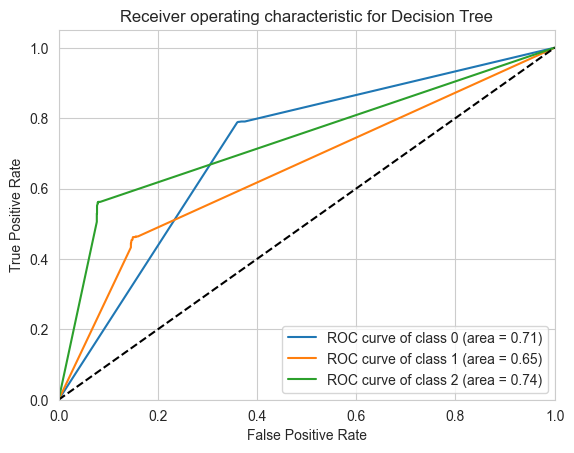

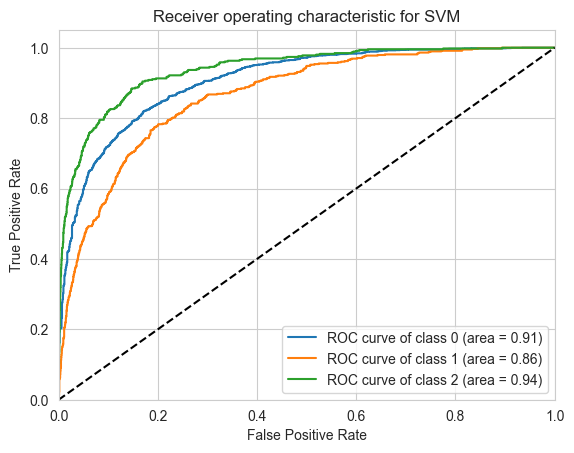

In [29]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_binarized = label_binarize(y, classes=['negative', 'neutral', 'positive'])

# Splitting the data again to get the same train/test split
X_train, X_test, y_train, y_test_binarized = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Get predicted probabilities
y_score_dt = dt_model.predict_proba(X_test)
y_score_svm = svm_model.predict_proba(X_test)

# Function to plot ROC Curve
def plot_roc_curve(y_test, y_score, model_name):
    n_classes = y_test.shape[1]
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC Curve for each model
plot_roc_curve(y_test_binarized, y_score_dt, "Decision Tree")
plot_roc_curve(y_test_binarized, y_score_svm, "SVM")


The Receiver Operating Characteristic (ROC) curves for the Decision Tree and Support Vector Machine (SVM) classifiers provide a visual comparison of the models' performance in classifying the different sentiment classes. The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between the classes. A higher AUC indicates a better performing model.

Comparison od the two models:

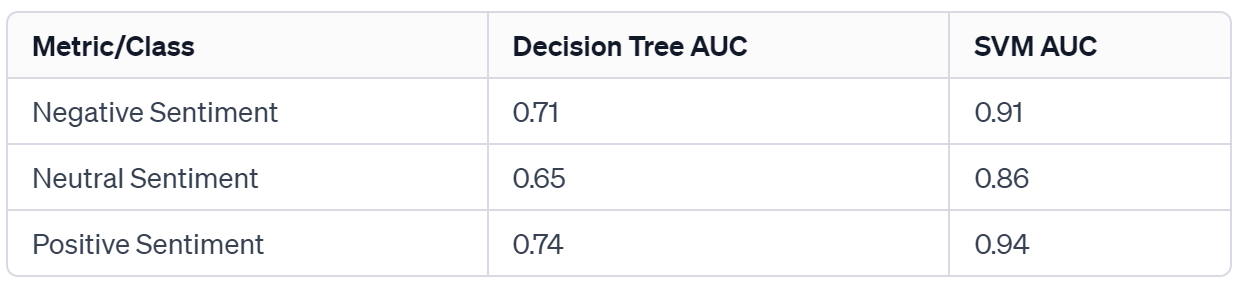

### Conclusion:
The SVM classifier has a significantly higher AUC for all three sentiment classes compared to the Decision Tree classifier. This indicates that the SVM has a better discriminative ability and is more capable of distinguishing between the different sentiment classes.

- For **negative sentiment** classification, the SVM is quite accurate, with an AUC of 0.91 compared to the Decision Tree's 0.71.
- In the case of **neutral sentiment**, the SVM also performs much better (AUC 0.86) than the Decision Tree (AUC 0.65).
- The **positive sentiment** sees the largest disparity, with the SVM achieving an AUC of 0.94, while the Decision Tree scores 0.74.

Given these results, the **SVM classifier** should be the preferred model. It demonstrates superior performance across all sentiment classes and is likely to provide better generalization on unseen data.